# P06: Goodness-of-fit and hypothesis testing

# Group 10:
Adhishree Lahiri <br>
Aditya Pandya <br>
Gervit Trehan <br>
Rupal Giri <br>

## Problem 1: Fitting stellar luminosities

Let us assume that we measure the luminosity as a function of time for four samples of stars. Each sample contains 100 stars and we measure their luminosity at 50 times each. The recorded values for the stellar luminosities for four samples are in the `data` directory and designated `starcat_1.npy`, `starcat_2.npy`, `starcat_3.npy` and `starcat_4.npy`. The values are given in units of $L_\odot$.

Our hypothesis is that all stars in these four catalogs are non-variable, i.e. their luminosity does not vary as a function of time, and that the observed luminosities are normally distributed with a standard deviation of $\sigma(L_*)=0.1L_*$.

(i) Test if the data is consistent with this hypothesis by comparing the data to model predictions and computing the $\chi^2$ values of the observed data with respect to the assumed model.

(ii) Try to diagnose the reasons for the discrepancies found (if any).

## Answer 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data
data1 = np.load('data/starcat_1.npy')
data2 = np.load('data/starcat_2.npy')
data3 = np.load('data/starcat_3.npy')
data4 = np.load('data/starcat_4.npy')
All_data = np.array((data1,data2,data3,data4))
All_data.shape

(4, 100, 50)

### (i)

Note from tutor:
Updated return chi_sq/(len(L_data)) to  return chi_sq/(len(L_data)-1)

In [3]:
# Function to get the reduced chi-squared value
def chi_sq(L_data):
    chi_sq = np.sum(np.square((L_data - np.mean(L_data)) / (0.1*np.mean(L_data))))
    return chi_sq/(len(L_data)-1)

red_chi_sq = np.zeros((len(data1), 4)).T

# Loop over all the data sets to get the reduced chi-squared values
for j in range(len(All_data)):
    for i in range(len(All_data[j])):
        red_chi_sq[j][i] = chi_sq(All_data[j][i])

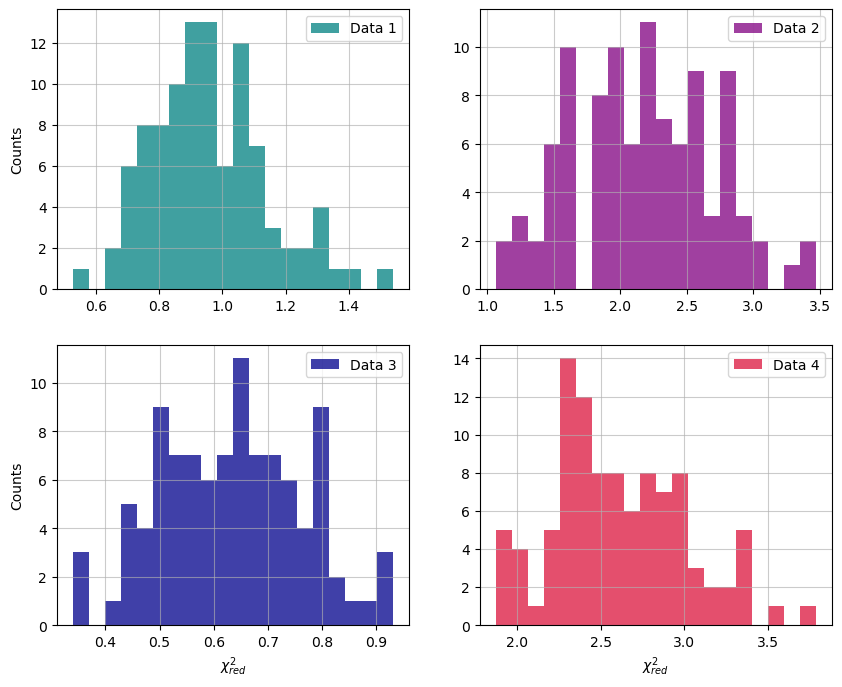

In [4]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

ax0.hist(red_chi_sq[0], bins=20, color = 'teal', label = 'Data 1', alpha = 0.75)
ax0.set_ylabel('Counts')
ax0.legend()
ax0.grid(alpha = 0.65)

ax1.hist(red_chi_sq[1], bins=20, color = 'purple', label = 'Data 2', alpha = 0.75)
ax1.legend()
ax1.grid(alpha = 0.65)

ax2.hist(red_chi_sq[2], bins=20, color = 'darkblue', label = 'Data 3', alpha = 0.75)
ax2.set_ylabel('Counts')
ax2.set_xlabel(r'$\chi^2_{red}$')
ax2.legend()
ax2.grid(alpha = 0.65)

ax3.hist(red_chi_sq[3], bins=20, color = 'crimson', label = 'Data 4', alpha = 0.75)
ax3.set_xlabel(r'$\chi^2_{red}$')
ax3.legend()
ax3.grid(alpha = 0.65)


The reduced $\chi^2$ values of dataset 1 is centered at 1 so the data is consistent with the model and the hypothesis holds. 

The reduced $\chi^2$ values of dataset 2 is centered at 2.2 so the data is not consistent with the model and it indicates that the errors are underestimated. 

The reduced $\chi^2$ values of dataset 3 is centered at 0.6 so the data is not consistent with the model and it indicates that the errors are overestimated. 

The reduced $\chi^2$ values of dataset 4 is centered at 2.5 so the data is not consistent with the model. Infact the the luminosity of the stars in dataset 4 vary with time. This can be seen from the plot below.

### (ii)

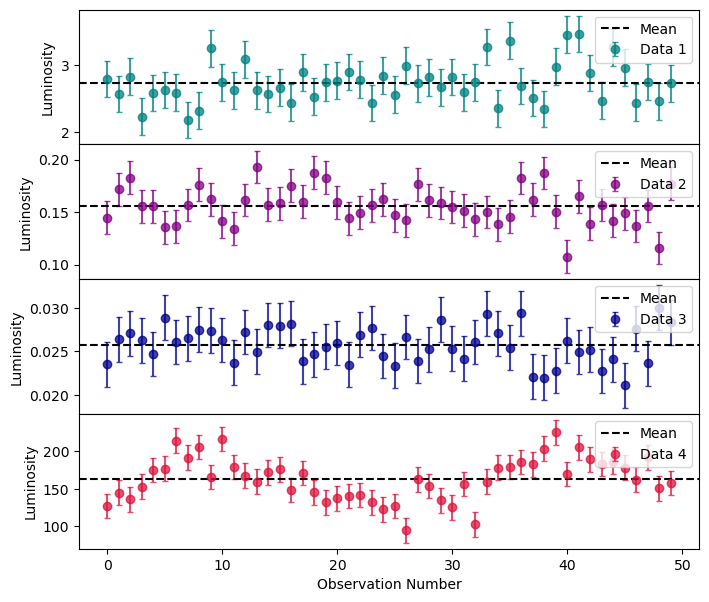

In [18]:
fig, ax = plt.subplots(4, 1, figsize=(8, 7))

x = np.linspace(0, 49, 50)
num = np.random.randint(0, 99) # Randomly choose a star out of 100

std = 0.1 * np.mean(All_data[0][num])
ax[0].errorbar(x, All_data[0][num], yerr=std, fmt='o', capsize=2, color='teal', label='Data 1', alpha=0.75)
ax[0].axhline(np.mean(All_data[0][num]), color='black', linestyle='--', label='Mean')
ax[0].set_xticks([])
ax[0].set_ylabel('Luminosity')
ax[0].legend(loc='upper right')

std = 0.1 * np.mean(All_data[1][num])
ax[1].errorbar(x, All_data[1][num], yerr=std, fmt='o', capsize=2, color='purple', label='Data 2', alpha=0.75)
ax[1].axhline(np.mean(All_data[1][num]), color='black', linestyle='--', label='Mean')
ax[1].set_xticks([])
ax[1].set_ylabel('Luminosity')
ax[1].legend(loc='upper right')

std = 0.1 * np.mean(All_data[2][num])
ax[2].errorbar(x, All_data[2][num], yerr=std, fmt='o', capsize=2, color='darkblue', label='Data 3', alpha=0.75)
ax[2].axhline(np.mean(All_data[2][num]), color='black', linestyle='--', label='Mean')
ax[2].set_xticks([])
ax[2].set_ylabel('Luminosity')
ax[2].legend(loc='upper right')

std = 0.1 * np.mean(All_data[3][num])
ax[3].errorbar(x, All_data[3][num], yerr=std, fmt='o', capsize=2, color='crimson', label='Data 4', alpha=0.75)
ax[3].axhline(np.mean(All_data[3][num]), color='black', linestyle='--', label='Mean')
ax[3].set_ylabel('Luminosity')
ax[3].legend(loc='upper right')
ax[3].set_xlabel('Observation Number')

plt.subplots_adjust(hspace=0)

## Problem 2: Magnitude distributions and colors

Use `astropy.io.fits` to load the six fits files called `magnitudes0.fits` to `magnitudes5.fits`. Find out how to extract the magnitudes of the galaxies in each of the files in $g$, $r$, and $i$ bands. Write a function that takes the fits object and returns the colors:
$$C_1 =  \mathrm{mag}_g - \mathrm{mag}_r$$
$$C_2 =  \mathrm{mag}_i - \mathrm{mag}_r$$
Plot histograms of the colors and the color-color plane of each of the catalogs. 

Can you spot the non-consistent catalogs by eye?

## Answer 2

In [54]:
from astropy.io import fits

# Loading the data to see what it contains
a = fits.open('data/magnitudes0.fits')
print(a[1].data.shape)
a[1].data

(10000,)


FITS_rec([(24.452785, 24.104403, 23.633108),
          (25.833122, 24.919685, 24.051146),
          (26.384165, 26.033396, 25.605598), ...,
          (26.497225, 25.469187, 25.131428),
          (26.254786, 24.9125  , 23.821442),
          (24.814413, 24.217068, 23.624323)],
         dtype=(numpy.record, [('G MAG', '>f4'), ('R MAG', '>f4'), ('I MAG', '>f4')]))

In [8]:
# Load the fits files
fits_files = ['data/magnitudes0.fits', 'data/magnitudes1.fits', 'data/magnitudes2.fits', 'data/magnitudes3.fits', 'data/magnitudes4.fits', 'data/magnitudes5.fits']

magnitudes_g = np.zeros((len(fits_files), 10000))
magnitudes_r = np.zeros((len(fits_files), 10000))
magnitudes_i = np.zeros((len(fits_files), 10000))

# Loop through each fits file to extract the magnitudes
for i in range(len(fits_files)):
    with fits.open(fits_files[i]) as hdul:
        magnitudes_g[i]=(hdul[1].data['G Mag'])
        magnitudes_r[i]=(hdul[1].data['R Mag'])
        magnitudes_i[i]=(hdul[1].data['I Mag'])

In [37]:
C1 = magnitudes_g - magnitudes_r
C2 = magnitudes_i - magnitudes_r

In [48]:
# Function to plot the histograms and scatter plots of color C1 and C2
def plot_hist(file_no):
    fig, ax = plt.subplots(1, 3, figsize=(16, 4))

    ax[0].hist(C1[file_no], bins=25, color='darkorange', alpha=0.75, label='C1 (G-R)')
    ax[0].set_xlabel('G-R')
    ax[0].set_ylabel('Counts')
    ax[0].legend()

    ax[1].hist(C2[file_no], bins=25, color='crimson', alpha=0.75, label='C2 (I-R)')
    ax[1].set_xlabel('I-R')
    ax[1].legend()
    ax[1].set_ylabel('Counts')

    ax[2].scatter(C1[file_no], C2[file_no], s=0.1, color='teal', alpha=0.75)
    ax[2].set_xlabel('G-R')
    ax[2].set_ylabel('I-R')

    plt.suptitle(f'File {file_no+1}', fontsize=16)

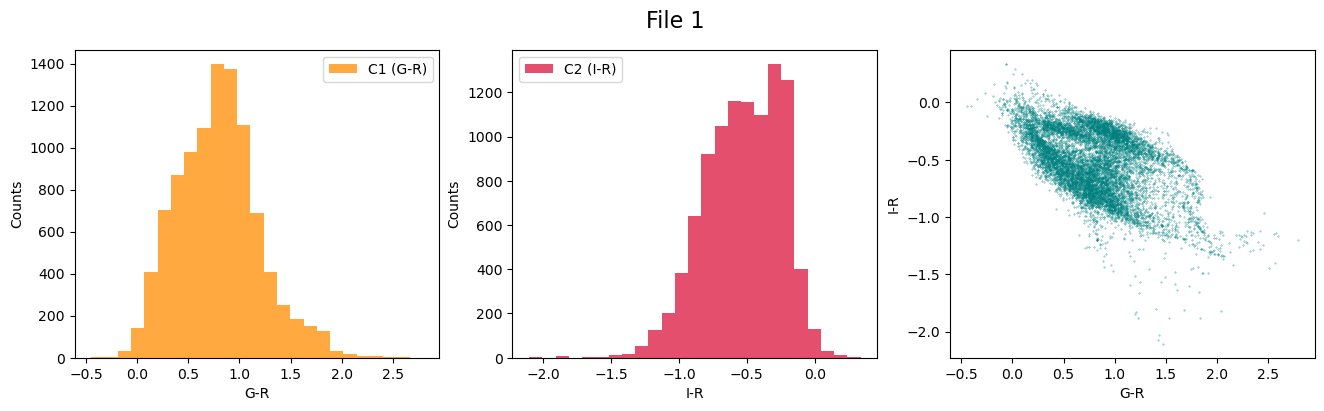

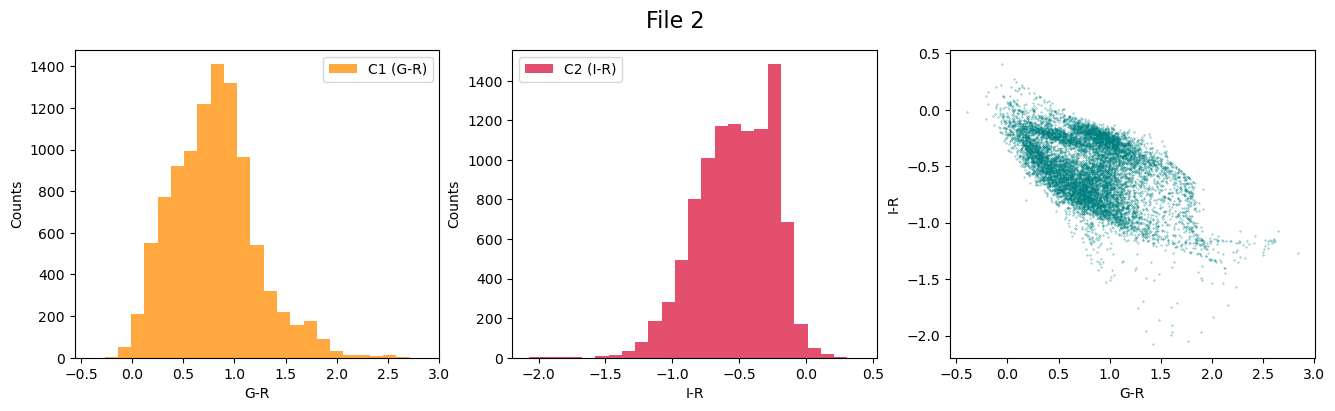

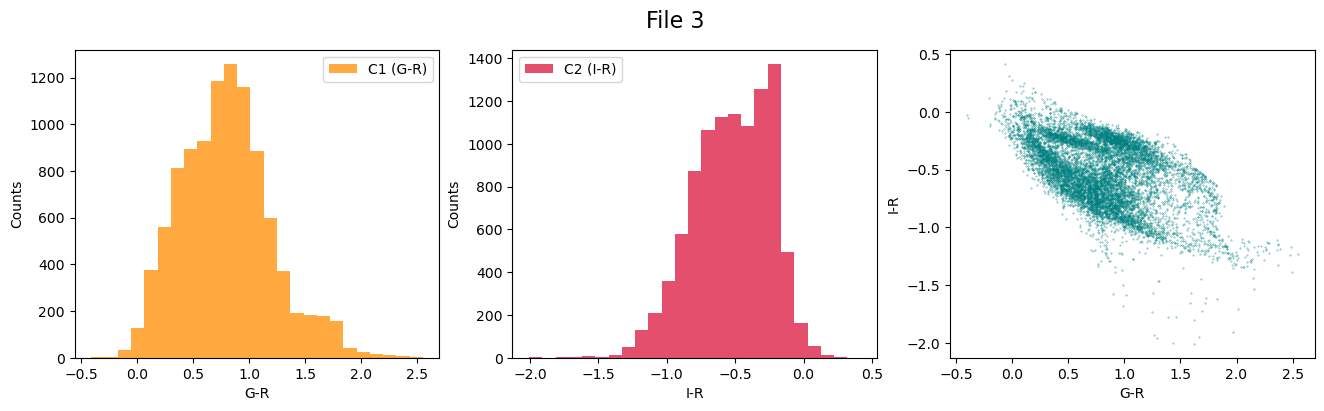

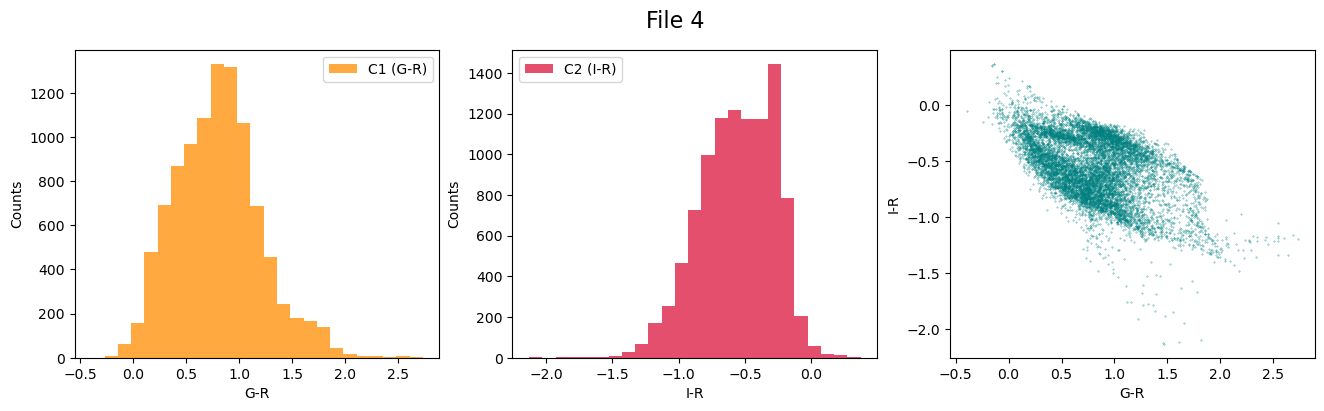

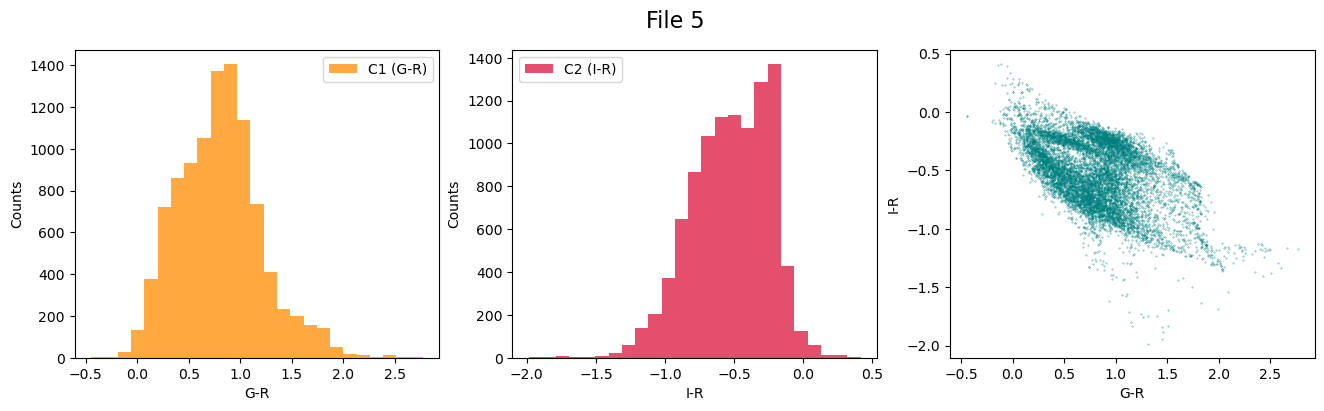

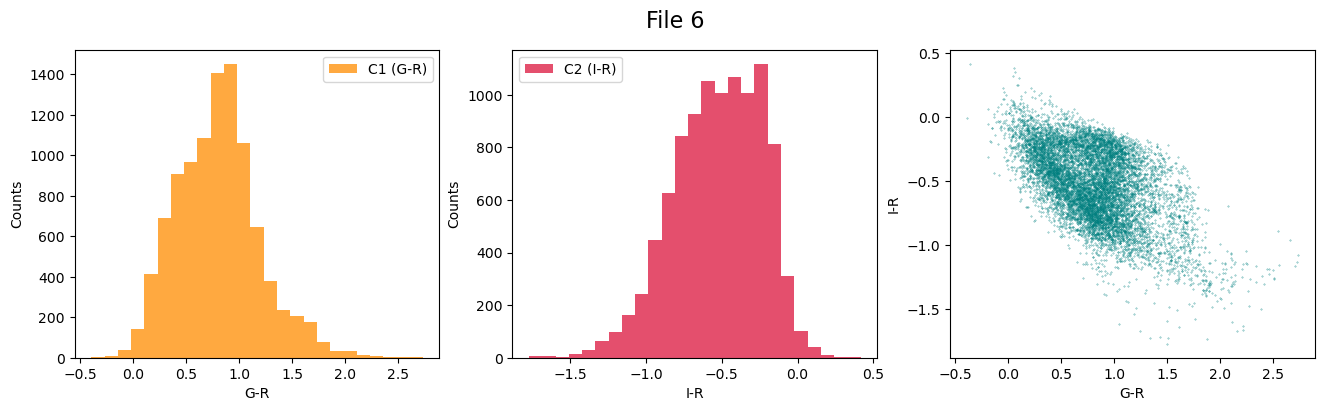

In [49]:
for i in range(len(fits_files)):
    plot_hist(i)

No, we cannot spot the non-consistent catalogs by eye.

Note from tutor: Look carefully, the last catalog is different from the others.

## Problem 3: T-test

Use the t-test (from `scipy.stats.ttest_ind`, for example) to compare both $C_1$ and $C_2$ between the different catalogs. 

Which catalogs are non-consistent with 95% confidence? 

## Answer 3

In [52]:
from scipy.stats import ttest_ind

# Calculate the t-statistic and p-value for each pair of data sets
C1_T = np.zeros((len(C1), len(C1)))
C1_P = np.zeros((len(C1), len(C1)))
for i in range(len(C1)):
    for j in range(len(C1)):
        t_statistic_C1, p_value_C1 = ttest_ind(C1[i], C1[j])
        C1_T[i][j] = t_statistic_C1
        C1_P[i][j] = p_value_C1
        
C2_T = np.zeros((len(C2), len(C2)))
C2_P = np.zeros((len(C2), len(C2)))
for i in range(len(C2)):
    for j in range(len(C2)):
        t_statistic_C2, p_value_C2 = ttest_ind(C2[i], C2[j])
        C2_T[i][j] = t_statistic_C2
        C2_P[i][j] = p_value_C2

Plot showing the p-values and t-test statistics for each pair of catalogs.

Text(0.5, 1.0, 'C2 P-Value')

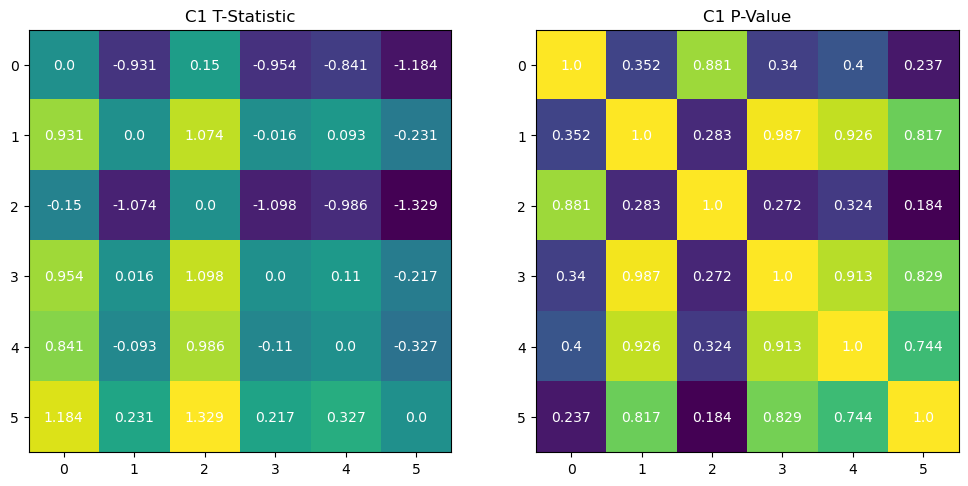

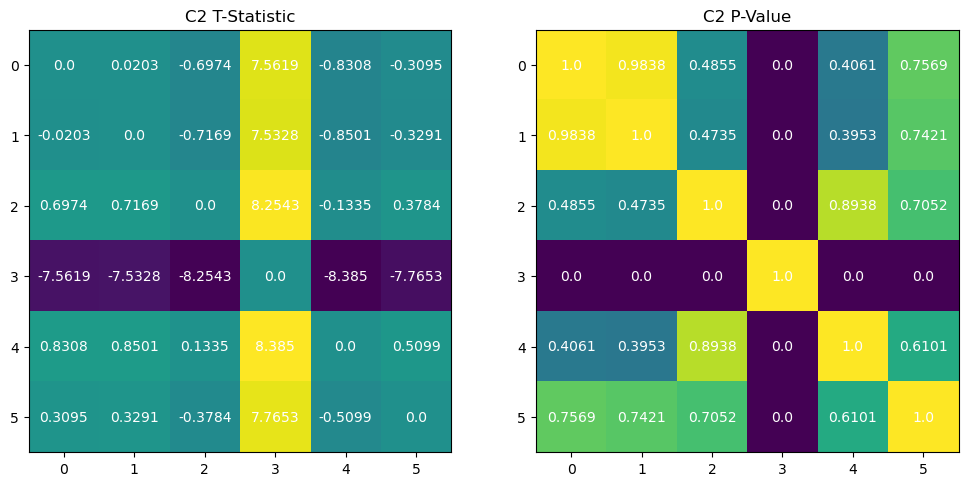

In [51]:
fig, ax = plt.subplots(1,2, figsize=(12, 6))
ax[0].imshow(C1_T)
for i in range(len(C1_T)):
    for j in range(len(C1_T)):
        text = ax[0].text(j, i, round(C1_T[i, j], 3),
                       ha = "center", va = "center", color = "w")  
ax[0].set_title("C1 T-Statistic")

ax[1].imshow(C1_P)
for i in range(len(C1_P)):
    for j in range(len(C1_P)):
        text = ax[1].text(j, i, round(C1_P[i, j], 3),
                       ha = "center", va = "center", color = "w")
ax[1].set_title("C1 P-Value")

fig, ax = plt.subplots(1,2, figsize=(12, 6))
ax[0].imshow(C2_T)
for i in range(len(C2_T)):
    for j in range(len(C2_T)):
        text = ax[0].text(j, i, round(C2_T[i, j], 4),
                       ha = "center", va = "center", color = "w")
ax[0].set_title("C2 T-Statistic")

ax[1].imshow(C2_P)
for i in range(len(C2_P)):
    for j in range(len(C2_P)):
        text = ax[1].text(j, i, round(C2_P[i, j], 4),
                       ha = "center", va = "center", color = "w")
ax[1].set_title("C2 P-Value")

Here we see that in C2, the catalog 3 is non-consistent with all other catalogs with 95% confidence.

In [53]:
# Perform t-test for C1 between catalogs
for i in range(len(C1)):
    for j in range(i+1):
        if i != j:
            t_statistic_C1, p_value_C1 = ttest_ind(C1[i], C1[j])
            if p_value_C1 < 0.05:
                print(f"Catalog {i} and {j} are non-consistent with 95% confidence for C1.")

# Perform t-test for C2 between catalogs
for i in range(len(C2)):
    for j in range(i+1):
        if i != j:
            t_statistic_C2, p_value_C2 = ttest_ind(C2[i], C2[j])
            if p_value_C2 < 0.05:
                print(f"Catalog {i} and {j} are non-consistent with 95% confidence for C2.")


Catalog 3 and 0 are non-consistent with 95% confidence for C2.
Catalog 3 and 1 are non-consistent with 95% confidence for C2.
Catalog 3 and 2 are non-consistent with 95% confidence for C2.
Catalog 4 and 3 are non-consistent with 95% confidence for C2.
Catalog 5 and 3 are non-consistent with 95% confidence for C2.


## Problem 4: KS-test

Use the KS-test (from `scipy.stats.ks_2samp`, for example) to compare both $C_1$ and $C_2$ between the different catalogs. 

(i) Which catalogs are non-consistent with 95% confidence? 

(ii) How do you explain the discrepancies between findings of problem 3 and 4?

## Answer 4

### (i)

In [19]:
from scipy.stats import ks_2samp

C1_KS = np.zeros((len(C1), len(C1)))
C1_P = np.zeros((len(C1), len(C1)))
for i in range(len(C1)):
    for j in range(len(C1)):
        ks_statistic_C1, p_value_C1 = ks_2samp(C1[i], C1[j])
        C1_KS[i][j] = ks_statistic_C1
        C1_P[i][j] = p_value_C1
        
C2_KS = np.zeros((len(C2), len(C2)))
C2_P = np.zeros((len(C2), len(C2)))
for i in range(len(C2)):
    for j in range(len(C2)):
        ks_statistic_C2, p_value_C2 = ks_2samp(C2[i], C2[j])
        C2_KS[i][j] = ks_statistic_C2
        C2_P[i][j] = p_value_C2

Plot showing the p-values and KS-test statistics for each pair of catalogs.

Text(0.5, 1.0, 'C2 P-Value')

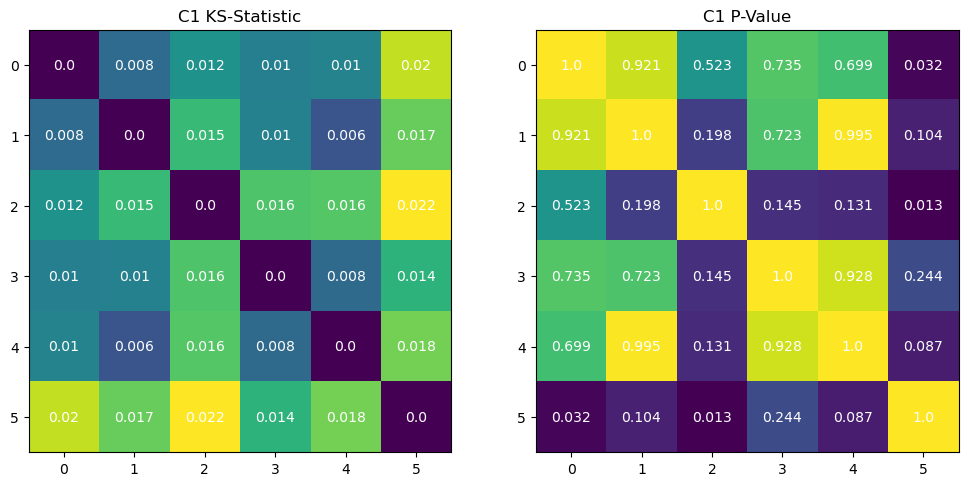

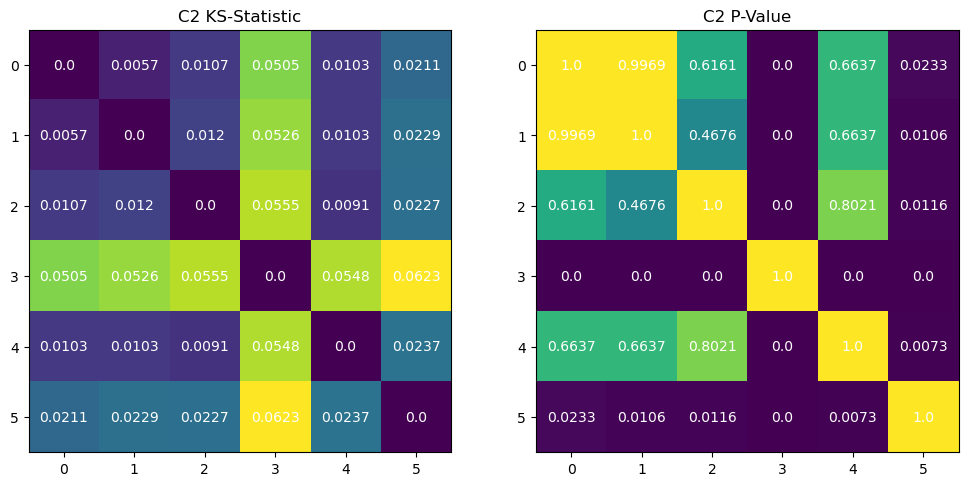

In [21]:
fig, ax = plt.subplots(1,2, figsize=(12, 6))
ax[0].imshow(C1_KS)
for i in range(len(C1_KS)):
    for j in range(len(C1_KS)):
        text = ax[0].text(j, i, round(C1_KS[i, j], 3),
                       ha = "center", va = "center", color = "w")  
ax[0].set_title("C1 KS-Statistic")

ax[1].imshow(C1_P)
for i in range(len(C1_P)):
    for j in range(len(C1_P)):
        text = ax[1].text(j, i, round(C1_P[i, j], 3),
                       ha = "center", va = "center", color = "w")
ax[1].set_title("C1 P-Value")

fig, ax = plt.subplots(1,2, figsize=(12, 6))
ax[0].imshow(C2_KS)
for i in range(len(C2_KS)):
    for j in range(len(C2_KS)):
        text = ax[0].text(j, i, round(C2_KS[i, j], 4),
                       ha = "center", va = "center", color = "w")      
ax[0].set_title("C2 KS-Statistic")

ax[1].imshow(C2_P)
for i in range(len(C2_P)):
    for j in range(len(C2_P)):
        text = ax[1].text(j, i, round(C2_P[i, j], 4),
                       ha = "center", va = "center", color = "w")        
ax[1].set_title("C2 P-Value")

Here we see that in C2, apart from catalog 3 not being consistent with all other catalogs with 95% confidence, catalog 5 is also not consistent with all other catalogs with 95% confidence.
Also, in C1, catalog 5 is not consistent with catalog 0 and 2 with 95% confidence.

In [14]:
# Perform KS-test for C1 between catalogs
for i in range(len(C1)):
    for j in range(i+1):
        if i != j:
            ks_statistic_C1, p_value_C1 = ks_2samp(C1[i], C1[j])
            if p_value_C1 < 0.05:
                print(f"Catalog {i} and {j} are non-consistent with 95% confidence for C1.")

# Perform KS-test for C2 between catalogs
for i in range(len(C2)):
    for j in range(i+1):
        if i != j:
            ks_statistic_C2, p_value_C2 = ks_2samp(C2[i], C2[j])
            if p_value_C2 < 0.05:
                print(f"Catalog {i} and {j} are non-consistent with 95% confidence for C2.")


Catalog 5 and 0 are non-consistent with 95% confidence for C1.
Catalog 5 and 2 are non-consistent with 95% confidence for C1.
Catalog 3 and 0 are non-consistent with 95% confidence for C2.
Catalog 3 and 1 are non-consistent with 95% confidence for C2.
Catalog 3 and 2 are non-consistent with 95% confidence for C2.
Catalog 4 and 3 are non-consistent with 95% confidence for C2.
Catalog 5 and 0 are non-consistent with 95% confidence for C2.
Catalog 5 and 1 are non-consistent with 95% confidence for C2.
Catalog 5 and 2 are non-consistent with 95% confidence for C2.
Catalog 5 and 3 are non-consistent with 95% confidence for C2.
Catalog 5 and 4 are non-consistent with 95% confidence for C2.


### (ii)

The t-test assumes that the data is normally distributed but as seen from the histograms of C1 and C2, the assumption no longer holds. Thus, in this case, KS-test will provide better results.

Tutor's comments:
T test only tests for the consistency of the mean whereas the KS test considers the full distribution. Hence, KS test is more robust.